In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("csv_files/Car_Purchasing_Data.csv")
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [3]:
condition = data.duplicated()
condition

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [4]:
data[data.duplicated()]

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount


In [5]:
data.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [8]:
data.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [9]:
data['Customer Name'].unique()

array(['Martina Avila', 'Harlan Barnes', 'Naomi Rodriquez',
       'Jade Cunningham', 'Cedric Leach', 'Carla Hester',
       'Griffin Rivera', 'Orli Casey', 'Marny Obrien', 'Rhonda Chavez',
       'Jerome Rowe', 'Akeem Gibson', 'Quin Smith', 'Tatum Moon',
       'Sharon Sharpe', 'Thomas Williams', 'Blaine Bender',
       'Stephen Lindsey', 'Sloane Mann', 'Athena Wolf', 'Blythe Romero',
       'Zelenia Byers', 'Nola Wiggins', 'Micah Wheeler', 'Caryn Hendrix',
       'Hedda Miranda', 'Ulric Lynn', 'Alma Pope', 'Gemma Hendrix',
       'Castor Wood', 'Herman Stevenson', 'Adrienne Bolton',
       'Dahlia Cleveland', 'Keane Browning', 'Quon Hull', 'Coby Charles',
       'Amery Cortez', 'Uriel Bradshaw', 'Fredericka Sanders',
       'Christopher Stevens', 'Rachel Ashley', 'Lael Wright',
       'Ryder Shaffer', 'Eric Noel', 'Tamara Guy', 'Quincy Bell',
       'Lee Taylor', 'Kenneth Pope', 'Reese Vance', 'Quon Carroll',
       'Magee Davidson', 'Leilani Gross', 'Morgan William',
       'Frances

In [10]:
data['Customer e-mail'].unique()

array(['cubilia.Curae.Phasellus@quisaccumsanconvallis.edu',
       'eu.dolor@diam.co.uk',
       'vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk',
       'malesuada@dignissim.com',
       'felis.ullamcorper.viverra@egetmollislectus.net',
       'mi@Aliquamerat.edu', 'vehicula@at.co.uk',
       'nunc.est.mollis@Suspendissetristiqueneque.co.uk',
       'Phasellus@sedsemegestas.org', 'nec@nuncest.com',
       'ipsum.cursus@dui.org', 'turpis.egestas.Fusce@purus.edu',
       'nulla@ipsum.edu', 'Cras.sed.leo@Seddiamlorem.ca',
       'eget.metus@aaliquetvel.co.uk', 'aliquet.molestie@ut.org',
       'ultrices.posuere.cubilia@pedenonummyut.net',
       'erat.eget.ipsum@tinciduntpede.org', 'at.augue@augue.net',
       'volutpat.Nulla.facilisis@primis.ca', 'Sed.eu@risusNuncac.co.uk',
       'auctor.non@sapien.co.uk', 'Aliquam@augue.edu',
       'arcu.eu@tincidunt.org', 'condimentum.Donec@duiCum.com',
       'scelerisque@magnased.com', 'sociis@vulputateveliteu.com',
       'Nunc.mauris

In [11]:
data['Country'].unique()

array(['USA'], dtype=object)

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing .LabelEncoder()
data['Customer Name'] = label_encoder.fit_transform(data['Customer Name'])
data['Customer Name'].unique()

array([288, 168, 311, 204,  70,  64, 158, 339, 285, 387, 214,   9, 364,
       441, 416, 446,  38, 426, 419,  24,  41, 494, 323, 303,  65, 176,
       457,  15, 150,  68, 178,   6,  95, 228, 371,  88,  16, 462, 143,
        84, 372, 246, 401, 134, 433, 365, 256, 231, 383, 370, 279, 258,
       308, 140, 377, 391, 286,  77, 121,  20, 397, 160, 149, 405, 380,
       333, 490, 263, 320, 306, 345, 290, 100, 293, 367, 177, 341,   3,
       355,  87,  58, 194,   0, 382, 408, 444,  11, 206, 126, 136, 237,
       109, 260, 488, 289,  18, 153, 185, 129, 146, 454, 343,  49, 378,
       487, 119, 438, 481, 268, 482, 332, 205, 223, 453, 473, 362, 117,
       247, 422, 101, 471, 116, 291, 301,   4, 389,  72, 241, 459, 326,
       338, 173, 440, 221, 272, 452, 281,  34, 489, 430, 128, 437, 145,
        54,  31, 254,  14, 317, 385, 340, 325, 431, 379, 113, 188,  98,
        28, 232, 292, 407, 175, 184, 456, 148, 363,  27, 161, 354, 110,
       203, 155,  74, 357,  62, 133, 435,  10, 356,  75, 346,   

In [13]:
label_encoder1 = preprocessing .LabelEncoder()
data['Customer e-mail'] = label_encoder1.fit_transform(data['Customer e-mail'])
data['Customer e-mail'].unique()

array([139, 224, 498, 307, 241, 319, 473, 353,  68, 334, 264, 457, 352,
        17, 179,  97, 461, 201, 114, 497,  76, 115,   8, 110, 128, 416,
       438,  56, 293, 482, 439, 152, 451,  28, 327, 333, 426, 462,  27,
       124, 450,  83,  64, 269, 330, 256,  80, 495, 177, 442,  73, 156,
       437, 283, 279, 161, 348, 361, 135,  12, 412,  34, 210, 199, 449,
       406, 292, 228, 195, 296,  86, 130, 336, 238, 287, 183, 142,   6,
       149, 376, 436, 275, 225, 276, 453, 341, 227, 277, 472, 312, 415,
        48, 286, 370, 190, 479, 441,  87, 430, 306, 150, 107, 499, 222,
       384,  18, 147, 463, 359, 411,  61, 294, 371, 170, 108, 310, 141,
       206,   9, 448, 414, 267, 278, 329,  16, 144, 299, 305, 435, 113,
       459, 180, 207,  39, 409,  43, 188, 125, 245, 236, 443, 123, 223,
       214,  69, 129, 230, 344, 377, 249, 244, 184, 116, 431, 258, 253,
         4,  90, 259, 217,   5,  60, 471, 221,  36, 137,  46, 474, 440,
       375, 380, 385, 429, 117, 111, 127, 394, 301, 314, 340, 13

In [14]:
label_encoder2 = preprocessing .LabelEncoder()
data['Country'] = label_encoder1.fit_transform(data['Country'])
data['Country'].unique()

array([0])

In [15]:
data.corr()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Customer Name,1.000000,-0.034360,NaN,-0.021926,0.016523,0.038859,0.028952,-0.008116,0.031218
Customer e-mail,-0.034360,1.000000,NaN,0.073458,-0.041863,0.010627,0.019145,0.048010,0.003429
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,-0.021926,0.073458,NaN,1.000000,-0.066488,-0.036499,0.024193,-0.008395,-0.066408
Age,0.016523,-0.041863,NaN,-0.066488,1.000000,0.000361,0.031748,0.021794,0.633273
Annual Salary,0.038859,0.010627,NaN,-0.036499,0.000361,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.028952,0.019145,NaN,0.024193,0.031748,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008116,0.048010,NaN,-0.008395,0.021794,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,0.031218,0.003429,NaN,-0.066408,0.633273,0.617862,0.028882,0.488580,1.000000


In [16]:
data.drop(['Country'],axis=1,inplace=True)

<Axes: >

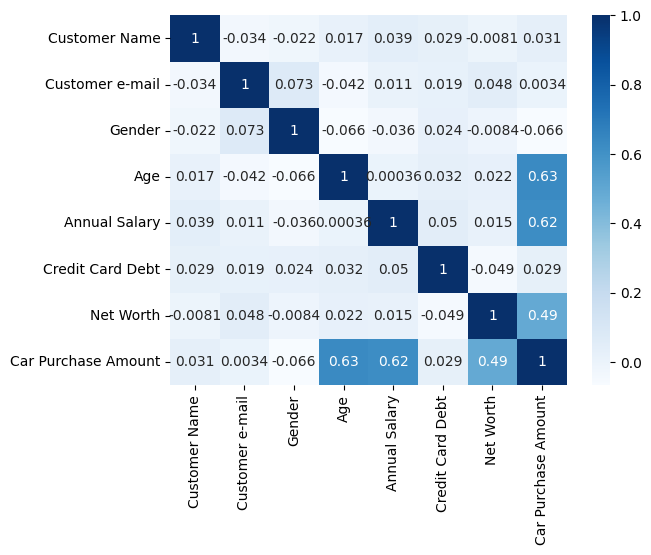

In [17]:
sns.heatmap(data.corr(),annot=True,cmap="Blues")

In [18]:
X = data.drop(['Car Purchase Amount'],axis=1)
y= data['Car Purchase Amount']
print(X)

     Customer Name  Customer e-mail  Gender  Age  Annual Salary  \
0              288              139       0   42    62812.09301   
1              168              224       0   41    66646.89292   
2              311              498       1   43    53798.55112   
3              204              307       1   58    79370.03798   
4               70              241       1   57    59729.15130   
..             ...              ...     ...  ...            ...   
495            475              289       0   41    71942.40291   
496            466               21       1   38    56039.49793   
497            352              381       1   54    68888.77805   
498            315               72       1   59    49811.99062   
499            284               11       1   47    61370.67766   

     Credit Card Debt    Net Worth  
0        11609.380910  238961.2505  
1         9572.957136  530973.9078  
2        11160.355060  638467.1773  
3        14426.164850  548599.0524  
4         

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=10
)

In [40]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [41]:
lr_model = LinearRegression()

In [42]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [43]:
pd.DataFrame(lr_model.coef_,X.columns,columns=['cofficient'])


,cofficient
Customer Name,0.120322
Customer e-mail,0.008330
Gender,24.091311
Age,841.050472
Annual Salary,0.561816
Credit Card Debt,0.004716
Net Worth,0.028881


In [44]:
y_pred = lr_model.predict(X_test)

In [45]:
com = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
com

,y_test,y_pred
151,47604.34591,47777.880616
424,31408.62631,31117.627759
154,42369.64247,42371.492764
190,56579.90338,56420.394088
131,38243.66481,38255.785740
...,...,...
50,27187.23914,27097.773811
264,54013.47595,53791.370333
34,39810.34817,39572.484358
78,38502.42392,38409.298749


In [46]:
len_test = len(y_pred)
len_test
default_arr = np.array(range(len_test))
default_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

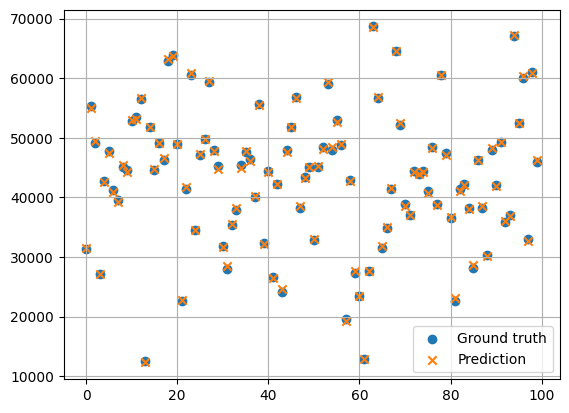

In [27]:
import matplotlib.pyplot as plt
plt.scatter(default_arr,y_test,marker='o',label="Ground truth")
plt.scatter(default_arr,y_pred,marker='x',label="Prediction")
plt.legend()
plt.grid()

In [28]:
lr_model.score(X_test,y_test)

0.9995493442675972

In [29]:
from sklearn import metrics
import numpy as np

In [30]:
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [31]:
MSE

59191.60739983302

# Decision Tree classification

In [32]:
from sklearn.tree import DecisionTreeRegressor


In [33]:
decisionTree = DecisionTreeRegressor()

In [34]:
decisionTree.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
#pd.DataFrame(decisionTree.coef_,X.columns,columns=['d_coeffient'])

In [35]:
decision_y_pred = decisionTree.predict(X_test)

In [36]:
com = pd.DataFrame({'decision_y_test':y_test,'decision_y_pred':decision_y_pred})
com

,decision_y_test,decision_y_pred
153,31300.54347,30826.10903
483,55377.87697,50702.18103
27,49091.97185,53110.88052
50,27187.23914,29556.79320
442,42705.11311,45593.68490
...,...,...
98,52474.71839,54823.19221
451,59984.16361,64147.28888
455,32967.20191,31215.64210
220,61118.46947,60763.24731


In [49]:
len_test =len(decision_y_pred)#how much length? 
len_test
default_arr= np.array(range(len_test))#array of data length
default_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [37]:
decisionTree.score(X_test,y_test)

0.8760150549798619

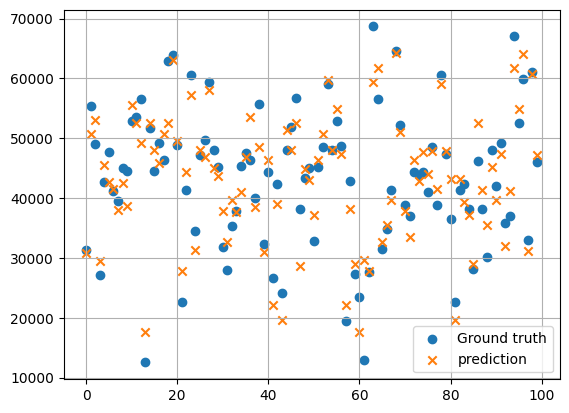

In [38]:
import matplotlib.pyplot as plt
plt.scatter(default_arr,y_test,marker='o',label="Ground truth")
plt.scatter(default_arr,decision_y_pred,marker='x',label="prediction")
plt.legend()
plt.grid()

In [51]:
from sklearn import metrics
import numpy as np

In [47]:
MSE = metrics.mean_squared_error(y_test,decision_y_pred)
#(45.1-47.62)^2
RMSE =np.sqrt(MSE)

In [48]:
MSE

205130629.1335159